This script compares the manual accuracy annotations with the ASR accuracy annotations

In [1]:
import pandas as pd
import os
import glob
import numpy as np

List all files with manual binary accuracy annotations of the word tasks

In [2]:
# Paths to human annotations
path_human_annotations = '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw'

human_annotation_files = glob.glob(os.path.join(path_human_annotations, '*.csv'))
human_annotation_files

['/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words1_round1_manual_accuracy_ann1.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words1_round1_manual_accuracy_ann3.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words1_round2_manual_accuracy_ann2.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words2_round1_manual_accuracy_ann1.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words2_round1_manual_accuracy_ann3.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words2_round2_manual_accuracy_ann2.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words3_round1_manual_accuracy_ann1.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words3_round1_manual_accuracy_ann3.csv',
 '/vol/tensusers2/wharmsen/SERDA-annotations/words_accuracy/01_raw/words3_round2_manual_accuracy_ann2.csv']

Define helper functions

In [3]:
def swap_correct_incorrect(binary_array):
    binary_array = [9 if x == 0 else 1 for x in binary_array]
    binary_array = [0 if x == 1 else 1 for x in binary_array ]
    return binary_array

Create list to save results

In [4]:
binary_accuracy_assessment_list = []

Add the manual assessments to this dataframe

In [5]:
def extract_info_from_accuracy_df(file, separator, task, r, annotatorID, annotatorType):
    binary_accuracy_assessment_DF = pd.DataFrame()

    # Read DF
    df = pd.read_csv(file, index_col=0, sep=separator)
    df = df.dropna()

    # Process DF information
    for studentID, row in df.iterrows():

        human_accuracy_item = [int(x) for x in np.array(row)]
        human_accuracy_item_reversed = swap_correct_incorrect(human_accuracy_item)
        human_accuracy_test = sum(human_accuracy_item)

        indexID = studentID + '_' + task + '_' + r + '_' + annotatorType
        audioID = studentID + '_' + task + '_' + r

        binary_accuracy_assessment_DF.loc[indexID, 'studentID'] = studentID
        binary_accuracy_assessment_DF.loc[indexID, 'audioID'] = audioID
        binary_accuracy_assessment_DF.loc[indexID, 'task'] = task
        binary_accuracy_assessment_DF.loc[indexID, 'round'] = r
        binary_accuracy_assessment_DF.loc[indexID, 'accuracy_items'] = str(human_accuracy_item)
        binary_accuracy_assessment_DF.loc[indexID, 'accuracy_items_reversed'] = str(human_accuracy_item_reversed)
        binary_accuracy_assessment_DF.loc[indexID, 'accuracy_task'] = human_accuracy_test
        binary_accuracy_assessment_DF.loc[indexID, 'annotatorID'] = annotatorID
        binary_accuracy_assessment_DF.loc[indexID, 'annotatorType'] = annotatorType

    return binary_accuracy_assessment_DF



In [6]:
for file in human_annotation_files:

    # Get information from file name

    # file = human_annotation_files[0]
    basename = os.path.basename(file)
    task = basename.split('_')[0]
    r = basename.split('_')[1]
    annotatorID = basename.split('_')[-1].replace('.csv', '')
    
    binary_accuracy_assessment_DF = extract_info_from_accuracy_df(file, ',', task, r, annotatorID, 'human')
    binary_accuracy_assessment_list.append(binary_accuracy_assessment_DF)

Add the automatic assessments to this dataframe

In [7]:
# Paths to ASR annotations
asr_annotation_files_round1 = glob.glob('/vol/tensusers2/wharmsen/SERDA-experiment-data/round1/words/whispert_dis/csv-scores/words*AsrAccuracyDF.tsv')
asr_annotation_files_round1

['/vol/tensusers2/wharmsen/SERDA-experiment-data/round1/words/whispert_dis/csv-scores/words1AsrAccuracyDF.tsv',
 '/vol/tensusers2/wharmsen/SERDA-experiment-data/round1/words/whispert_dis/csv-scores/words2AsrAccuracyDF.tsv',
 '/vol/tensusers2/wharmsen/SERDA-experiment-data/round1/words/whispert_dis/csv-scores/words3AsrAccuracyDF.tsv']

In [8]:
asr_annotation_files_round2 = glob.glob('/vol/tensusers2/wharmsen/SERDA-experiment-data/round2/words/whispert_dis/csv-scores/words*AsrAccuracyDF.tsv')
asr_annotation_files_round2

['/vol/tensusers2/wharmsen/SERDA-experiment-data/round2/words/whispert_dis/csv-scores/words1AsrAccuracyDF.tsv',
 '/vol/tensusers2/wharmsen/SERDA-experiment-data/round2/words/whispert_dis/csv-scores/words2AsrAccuracyDF.tsv',
 '/vol/tensusers2/wharmsen/SERDA-experiment-data/round2/words/whispert_dis/csv-scores/words3AsrAccuracyDF.tsv']

In [9]:
binary_accuracy_assessment_DF = pd.DataFrame()

for file in asr_annotation_files_round1:

    # Get information from file name
    basename = os.path.basename(file)
    task = basename.replace('AsrAccuracyDF.tsv', '')
    r = 'round1'
    annotatorID = 'whispert_dis'

    binary_accuracy_assessment_DF = extract_info_from_accuracy_df(file, '\t', task, r, annotatorID, 'asr')
    binary_accuracy_assessment_list.append(binary_accuracy_assessment_DF)


In [10]:
binary_accuracy_assessment_DF = pd.DataFrame()

for file in asr_annotation_files_round2:

    # Get information from file name
    basename = os.path.basename(file)
    task = basename.replace('AsrAccuracyDF.tsv', '')
    r = 'round2'
    annotatorID = 'whispert_dis'

    binary_accuracy_assessment_DF = extract_info_from_accuracy_df(file, '\t', task, r, annotatorID, 'asr')
    binary_accuracy_assessment_list.append(binary_accuracy_assessment_DF)

In [11]:
binary_accuracy_assessments_finalDF = pd.concat(binary_accuracy_assessment_list)

In [12]:
binary_accuracy_assessments_finalDF

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_human,2RRDV,2RRDV_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
2RWNQ_words1_round1_human,2RWNQ,2RWNQ_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",48.0,ann1,human
2W45J_words1_round1_human,2W45J,2W45J_words1_round1,words1,round1,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",47.0,ann1,human
33JNC_words1_round1_human,33JNC,33JNC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
3MGQC_words1_round1_human,3MGQC,3MGQC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann1,human
...,...,...,...,...,...,...,...,...,...
ZTWTV_words3_round2_asr,ZTWTV,ZTWTV_words3_round2,words3,round2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.0,whispert_dis,asr
ZVCKM_words3_round2_asr,ZVCKM,ZVCKM_words3_round2,words3,round2,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...",23.0,whispert_dis,asr
ZX3J2_words3_round2_asr,ZX3J2,ZX3J2_words3_round2,words3,round2,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42.0,whispert_dis,asr
ZXQDG_words3_round2_asr,ZXQDG,ZXQDG_words3_round2,words3,round2,"[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",32.0,whispert_dis,asr


In [13]:
# Select all files that have both ASR and HUMAN assessment
files_with_asr_and_human_annot = binary_accuracy_assessments_finalDF['audioID'].value_counts().index[binary_accuracy_assessments_finalDF['audioID'].value_counts() == 2]
len(files_with_asr_and_human_annot)

555

In [14]:
# Select all assessments belonging to these files
binary_accuracy_assessments_finalDF_balanced = binary_accuracy_assessments_finalDF[binary_accuracy_assessments_finalDF['audioID'].isin(files_with_asr_and_human_annot)]
binary_accuracy_assessments_finalDF_balanced

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_human,2RRDV,2RRDV_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
2RWNQ_words1_round1_human,2RWNQ,2RWNQ_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",48.0,ann1,human
2W45J_words1_round1_human,2W45J,2W45J_words1_round1,words1,round1,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",47.0,ann1,human
33JNC_words1_round1_human,33JNC,33JNC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
3MGQC_words1_round1_human,3MGQC,3MGQC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann1,human
...,...,...,...,...,...,...,...,...,...
ZGHDC_words3_round2_asr,ZGHDC,ZGHDC_words3_round2,words3,round2,"[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",33.0,whispert_dis,asr
ZTWTV_words3_round2_asr,ZTWTV,ZTWTV_words3_round2,words3,round2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.0,whispert_dis,asr
ZVCKM_words3_round2_asr,ZVCKM,ZVCKM_words3_round2,words3,round2,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...",23.0,whispert_dis,asr
ZX3J2_words3_round2_asr,ZX3J2,ZX3J2_words3_round2,words3,round2,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42.0,whispert_dis,asr


In [15]:
binary_accuracy_assessments_finalDF_balanced_HUMAN = binary_accuracy_assessments_finalDF_balanced[binary_accuracy_assessments_finalDF_balanced['annotatorType'] == 'human']
binary_accuracy_assessments_finalDF_balanced_HUMAN

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_human,2RRDV,2RRDV_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
2RWNQ_words1_round1_human,2RWNQ,2RWNQ_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",48.0,ann1,human
2W45J_words1_round1_human,2W45J,2W45J_words1_round1,words1,round1,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",47.0,ann1,human
33JNC_words1_round1_human,33JNC,33JNC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
3MGQC_words1_round1_human,3MGQC,3MGQC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann1,human
...,...,...,...,...,...,...,...,...,...
ZGHDC_words3_round2_human,ZGHDC,ZGHDC_words3_round2,words3,round2,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",47.0,ann2,human
ZTWTV_words3_round2_human,ZTWTV,ZTWTV_words3_round2,words3,round2,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",8.0,ann2,human
ZVCKM_words3_round2_human,ZVCKM,ZVCKM_words3_round2,words3,round2,"[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, ...",37.0,ann2,human
ZX3J2_words3_round2_human,ZX3J2,ZX3J2_words3_round2,words3,round2,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann2,human


In [16]:
binary_accuracy_assessments_finalDF_balanced_ASR = binary_accuracy_assessments_finalDF_balanced[binary_accuracy_assessments_finalDF_balanced['annotatorType'] == 'asr']
binary_accuracy_assessments_finalDF_balanced_ASR

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_asr,2RRDV,2RRDV_words1_round1,words1,round1,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",38.0,whispert_dis,asr
2RWNQ_words1_round1_asr,2RWNQ,2RWNQ_words1_round1,words1,round1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",28.0,whispert_dis,asr
2W45J_words1_round1_asr,2W45J,2W45J_words1_round1,words1,round1,"[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",21.0,whispert_dis,asr
33JNC_words1_round1_asr,33JNC,33JNC_words1_round1,words1,round1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.0,whispert_dis,asr
3MGQC_words1_round1_asr,3MGQC,3MGQC_words1_round1,words1,round1,"[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...","[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...",38.0,whispert_dis,asr
...,...,...,...,...,...,...,...,...,...
ZGHDC_words3_round2_asr,ZGHDC,ZGHDC_words3_round2,words3,round2,"[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",33.0,whispert_dis,asr
ZTWTV_words3_round2_asr,ZTWTV,ZTWTV_words3_round2,words3,round2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.0,whispert_dis,asr
ZVCKM_words3_round2_asr,ZVCKM,ZVCKM_words3_round2,words3,round2,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...",23.0,whispert_dis,asr
ZX3J2_words3_round2_asr,ZX3J2,ZX3J2_words3_round2,words3,round2,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42.0,whispert_dis,asr


Test-level ICC & Visualization

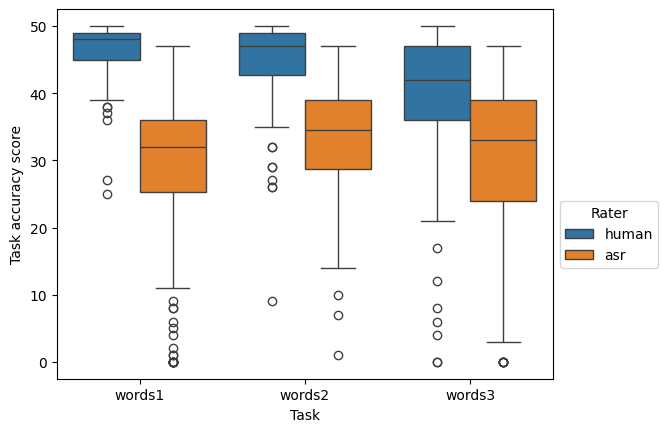

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
boxplot = sns.boxplot(data=binary_accuracy_assessments_finalDF_balanced, x="task", y="accuracy_task", hue="annotatorType")
boxplot.set_xlabel('Task')
boxplot.set_ylabel('Task accuracy score')
plt.legend(title='Rater', loc='upper left', bbox_to_anchor=(1, 0.5))
# sns.move_legend(boxplot, "upper left", bbox_to_anchor=(1, 0.5))


In [18]:
binary_accuracy_assessments_finalDF_balanced_HUMAN

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_human,2RRDV,2RRDV_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
2RWNQ_words1_round1_human,2RWNQ,2RWNQ_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",48.0,ann1,human
2W45J_words1_round1_human,2W45J,2W45J_words1_round1,words1,round1,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",47.0,ann1,human
33JNC_words1_round1_human,33JNC,33JNC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
3MGQC_words1_round1_human,3MGQC,3MGQC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann1,human
...,...,...,...,...,...,...,...,...,...
ZGHDC_words3_round2_human,ZGHDC,ZGHDC_words3_round2,words3,round2,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",47.0,ann2,human
ZTWTV_words3_round2_human,ZTWTV,ZTWTV_words3_round2,words3,round2,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",8.0,ann2,human
ZVCKM_words3_round2_human,ZVCKM,ZVCKM_words3_round2,words3,round2,"[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, ...",37.0,ann2,human
ZX3J2_words3_round2_human,ZX3J2,ZX3J2_words3_round2,words3,round2,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann2,human


In [19]:
# import matplotlib.pyplot as plt 

# plt.figure(figsize=(20,8))
# x = list(np.arange(0,len(binary_accuracy_assessments_finalDF_balanced_HUMAN),1))

# plt.plot(x, list(binary_accuracy_assessments_finalDF_balanced_ASR['accuracy_task']),color='green')
# plt.plot(x, list(binary_accuracy_assessments_finalDF_balanced_HUMAN['accuracy_task']), color='orange')
# plt.show()

In [20]:
import pingouin as pg
icc = pg.intraclass_corr(data=binary_accuracy_assessments_finalDF_balanced, targets='audioID', raters='annotatorType', ratings='accuracy_task').round(3)
icc

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.027,1.056,554,555,0.261,"[-0.06, 0.11]"
1,ICC2,Single random raters,0.278,3.718,554,554,0.000,"[-0.1, 0.58]"
2,ICC3,Single fixed raters,0.576,3.718,554,554,0.000,"[0.52, 0.63]"
3,ICC1k,Average raters absolute,0.053,1.056,554,555,0.261,"[-0.12, 0.2]"
4,ICC2k,Average random raters,0.436,3.718,554,554,0.000,"[-0.21, 0.74]"
5,ICC3k,Average fixed raters,0.731,3.718,554,554,0.000,"[0.68, 0.77]"


<Axes: >

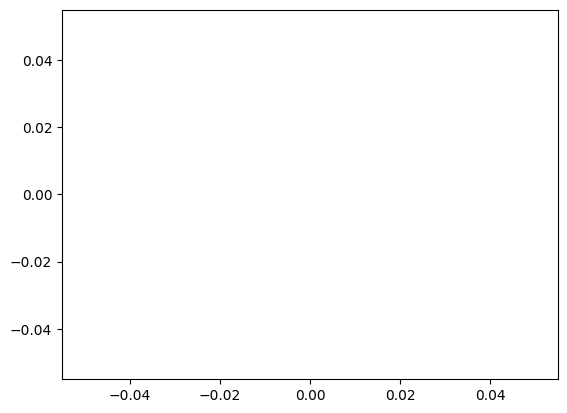

In [21]:
sns.scatterplot(x=binary_accuracy_assessments_finalDF_balanced[binary_accuracy_assessments_finalDF_balanced['annotatorType'] == 'human']['accuracy_task'], y=binary_accuracy_assessments_finalDF_balanced[binary_accuracy_assessments_finalDF_balanced['annotatorType'] == 'asr']['accuracy_task'])

In [22]:
# Remove all rows with missing data

In [23]:
# Compute ICC on task level between human and asr assessments

# student
# task (WHAT IS RATED)
# audio_path
# accuracy_item
# accuracy_task (SCORE)
# annotator_id 
# annotator_type (human or asr) (RATER)

# Item-level binary metrics

In [24]:
studentID = '2RRDV'
r = 'round1'
task = 'words1'

binary_accuracy_assessments_finalDF[(binary_accuracy_assessments_finalDF['studentID'] == studentID) & (binary_accuracy_assessments_finalDF['round'] == r) & (binary_accuracy_assessments_finalDF['task'] == task)]

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_human,2RRDV,2RRDV_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
2RRDV_words1_round1_asr,2RRDV,2RRDV_words1_round1,words1,round1,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",38.0,whispert_dis,asr


In [25]:
# Select files from ann2
files_ann2 = binary_accuracy_assessments_finalDF_balanced[binary_accuracy_assessments_finalDF_balanced['annotatorID'] == 'ann2']['audioID']
print(len(files_ann2))

# Select all assessments belonging to these files
binary_accuracy_assessments_finalDF_balanced_ann2 = binary_accuracy_assessments_finalDF_balanced[binary_accuracy_assessments_finalDF_balanced['audioID'].isin(files_ann2)]
binary_accuracy_assessments_finalDF_balanced_ann2 = binary_accuracy_assessments_finalDF_balanced_ann2.sort_index()
binary_accuracy_assessments_finalDF_balanced_ann2

330


,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
233NW_words1_round2_asr,233NW,233NW_words1_round2,words1,round2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,whispert_dis,asr
233NW_words1_round2_human,233NW,233NW_words1_round2,words1,round2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",49.0,ann2,human
233NW_words2_round2_asr,233NW,233NW_words2_round2,words2,round2,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",43.0,whispert_dis,asr
233NW_words2_round2_human,233NW,233NW_words2_round2,words2,round2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann2,human
233NW_words3_round2_asr,233NW,233NW_words3_round2,words3,round2,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",45.0,whispert_dis,asr
...,...,...,...,...,...,...,...,...,...
ZZ5BZ_words1_round2_human,ZZ5BZ,ZZ5BZ_words1_round2,words1,round2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann2,human
ZZ5BZ_words2_round2_asr,ZZ5BZ,ZZ5BZ_words2_round2,words2,round2,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",33.0,whispert_dis,asr
ZZ5BZ_words2_round2_human,ZZ5BZ,ZZ5BZ_words2_round2,words2,round2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",49.0,ann2,human
ZZ5BZ_words3_round2_asr,ZZ5BZ,ZZ5BZ_words3_round2,words3,round2,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",38.0,whispert_dis,asr


In [29]:
import ast
from sklearn.metrics import matthews_corrcoef, precision_score, confusion_matrix, f1_score, accuracy_score, recall_score, roc_auc_score

def computeEvaluationMetrics(title, y_true, y_pred):
    size = "N=" + str(len(y_true))
    acc = "Acc=" + str(round(accuracy_score(y_true, y_pred),3))
    prec = "Prec=" + str(round(precision_score(y_true, y_pred, zero_division=np.nan),3))
    recall = "Recall=" + str(round(recall_score(y_true, y_pred),3))
    f1 = "F1=" + str(round(f1_score(y_true, y_pred, zero_division=np.nan),3))
    mcc = "MCC=" + str(round(matthews_corrcoef(y_true, y_pred),3))

    try:
        auc = "AUC=" + str(round(roc_auc_score(y_true, y_pred),3))
    except:
        auc = "AUC=" + str(np.nan)

    return "    ".join([title, size, acc, prec, recall, f1, mcc, auc])

def compute_metrics_from_accuracy_items_reversed(df_human, df_asr, title):

    human = np.array([ast.literal_eval(x) for x in df_human['accuracy_items_reversed']]).flatten()
    asr = np.array([ast.literal_eval(x) for x in df_asr['accuracy_items_reversed']]).flatten()

    print(confusion_matrix(human,asr))

    round(matthews_corrcoef(human, asr),2)

    print(computeEvaluationMetrics(title, human, asr))

    # tn, fp, fn, tp = confusion_matrix(human, asr).ravel()
    # matthews_corrcoef(human, asr)
    # precision_score(human, asr)
    # f1_score(human,asr)
    # print(len(human))

# df_human = binary_accuracy_assessments_finalDF_balanced_ann1[binary_accuracy_assessments_finalDF_balanced_ann1['annotatorType'] == 'human']
# df_asr = binary_accuracy_assessments_finalDF_balanced_ann1[binary_accuracy_assessments_finalDF_balanced_ann1['annotatorType'] == 'asr']

df_human = binary_accuracy_assessments_finalDF_balanced_ann2[binary_accuracy_assessments_finalDF_balanced_ann2['annotatorType'] == 'human']
df_asr = binary_accuracy_assessments_finalDF_balanced_ann2[binary_accuracy_assessments_finalDF_balanced_ann2['annotatorType'] == 'asr']

# df_human = binary_accuracy_assessments_finalDF_balanced_ann3[binary_accuracy_assessments_finalDF_balanced_ann3['annotatorType'] == 'human']
# df_asr = binary_accuracy_assessments_finalDF_balanced_ann3[binary_accuracy_assessments_finalDF_balanced_ann3['annotatorType'] == 'asr']

compute_metrics_from_accuracy_items_reversed(df_human, df_asr, "title")

[[9980 4408]
 [ 147 1965]]
title    N=16500    Acc=0.724    Prec=0.308    Recall=0.93    F1=0.463    MCC=0.428    AUC=0.812


In [27]:
# human = np.array([ast.literal_eval(x) for x in binary_accuracy_assessments_finalDF_balanced_HUMAN['accuracy_items_reversed']]).flatten()
# asr = np.array([ast.literal_eval(x) for x in binary_accuracy_assessments_finalDF_balanced_ASR['accuracy_items_reversed']]).flatten()

compute_metrics_from_accuracy_items_reversed(binary_accuracy_assessments_finalDF_balanced_HUMAN, binary_accuracy_assessments_finalDF_balanced_ASR, 'title')

[[15712  8679]
 [ 1385  1974]]


In [32]:
binary_accuracy_assessments_finalDF_balanced_HUMAN

,studentID,audioID,task,round,accuracy_items,accuracy_items_reversed,accuracy_task,annotatorID,annotatorType
2RRDV_words1_round1_human,2RRDV,2RRDV_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
2RWNQ_words1_round1_human,2RWNQ,2RWNQ_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",48.0,ann1,human
2W45J_words1_round1_human,2W45J,2W45J_words1_round1,words1,round1,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",47.0,ann1,human
33JNC_words1_round1_human,33JNC,33JNC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann1,human
3MGQC_words1_round1_human,3MGQC,3MGQC_words1_round1,words1,round1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.0,ann1,human
...,...,...,...,...,...,...,...,...,...
ZGHDC_words3_round2_human,ZGHDC,ZGHDC_words3_round2,words3,round2,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",47.0,ann2,human
ZTWTV_words3_round2_human,ZTWTV,ZTWTV_words3_round2,words3,round2,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",8.0,ann2,human
ZVCKM_words3_round2_human,ZVCKM,ZVCKM_words3_round2,words3,round2,"[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, ...",37.0,ann2,human
ZX3J2_words3_round2_human,ZX3J2,ZX3J2_words3_round2,words3,round2,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.0,ann2,human


In [33]:
set(binary_accuracy_assessments_finalDF_balanced_HUMAN['studentID'])

{'233NW',
 '2RRDV',
 '2RWNQ',
 '2RYQP',
 '2W45J',
 '2Y4ZJ',
 '33JNC',
 '3DNVF',
 '3MGQC',
 '3PBFH',
 '3STV2',
 '42VVQ',
 '433HS',
 '434QS',
 '4D3CZ',
 '4JDM4',
 '4KCW4',
 '4MD4Y',
 '4QX3R',
 '4SJSC',
 '4TD2Q',
 '4ZMRG',
 '52GR2',
 '52MWF',
 '54TTZ',
 '5B2ZB',
 '5C2HJ',
 '5DT2P',
 '5FHDQ',
 '5HMXC',
 '5HVDT',
 '5M3XR',
 '5NFJG',
 '5NMJH',
 '5PTZK',
 '5WS5C',
 '5XVWF',
 'B3NZV',
 'B4HNC',
 'BBKVQ',
 'BBMRP',
 'BCHCC',
 'BCJPZ',
 'BCKTK',
 'BHB52',
 'BHNZM',
 'BJMJF',
 'BKCMS',
 'BMMYK',
 'BMPYQ',
 'BNQQ5',
 'BNTNR',
 'BNXP5',
 'BPJBQ',
 'BQCK2',
 'BQZDX',
 'BRSBY',
 'BVXRK',
 'BW5HH',
 'BXGBY',
 'BYRP5',
 'C2WKS',
 'CCXBB',
 'CDZGC',
 'CHHGP',
 'CJVCD',
 'CJVPZ',
 'CMZS2',
 'CNCNC',
 'CNFZH',
 'CPSGN',
 'CQNJN',
 'CRD3Q',
 'CSNVV',
 'CSRWJ',
 'CSZMP',
 'CTDKM',
 'CVRCT',
 'CWMS3',
 'DFVCK',
 'DMWJG',
 'DNGRJ',
 'DQNKY',
 'DVKXP',
 'DVNPZ',
 'DW3NF',
 'DWNWQ',
 'DXBKX',
 'F4NQX',
 'FKK54',
 'FMPWM',
 'FPDWY',
 'FQWJQ',
 'FQY3S',
 'FR5YS',
 'FRXZG',
 'FTGHB',
 'FWGHG',
 'FZQCX',
 'GBHNS',


In [28]:
# Compute MCC, precision, recall, NPV, Specificity on item level between human and asr assessments, therefore the structure of the dataframe needs to be changed.

# student
# task (WHAT IS RATED)
# audio_path
# accuracy_item
# accuracy_task (SCORE)
# annotator_id 
# annotator_type (human or asr) (RATER)

# Set audio_path as id
# DF1: Select all human assessments, only accuracy_item, flatten the series
# DF2: Select all ASR assessments, only accuracy_item, flatten the series